In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import numpy as np
import itertools
plt.style.use('default')

In [2]:
based_dir='saved_models/14ptm/diamino1_atom_stan_mollog_NMeta_DiAtom_0528/'
datasets=[]
#get all csv files in the datasets directory
# mods = ['Acetyl','Carbamidomethyl','Crotonyl','Deamidated','Dimethyl','Formyl','Malonyl','Methyl','Nitro','Oxidation',
#        'Phospho','Propionyl','Succinyl','Trimethyl']
mods = ['Methyl','Dimethyl','Trimethyl','Acetyl','Succinyl','Propionyl','Crotonyl','Malonyl','Formyl','Oxidation',
       'Phospho','Carbamidomethyl','Deamidated','Nitro']
pd.read_csv(based_dir+mods[0]+'_best_results.csv')

,Unnamed: 0,y_test,output_test,output_test_no_mod
0,0,18.966875,19.899977,19.563755
1,1,33.016750,32.879795,32.650661
2,2,36.524376,35.590553,34.870388
3,3,17.571625,17.498327,17.114553
4,4,26.047874,26.597778,26.528103
...,...,...,...,...
746,746,13.236000,12.997789,12.865030
747,747,20.851000,23.145004,22.772306
748,748,12.513500,12.507223,12.533802
749,749,23.393999,23.238804,23.540501


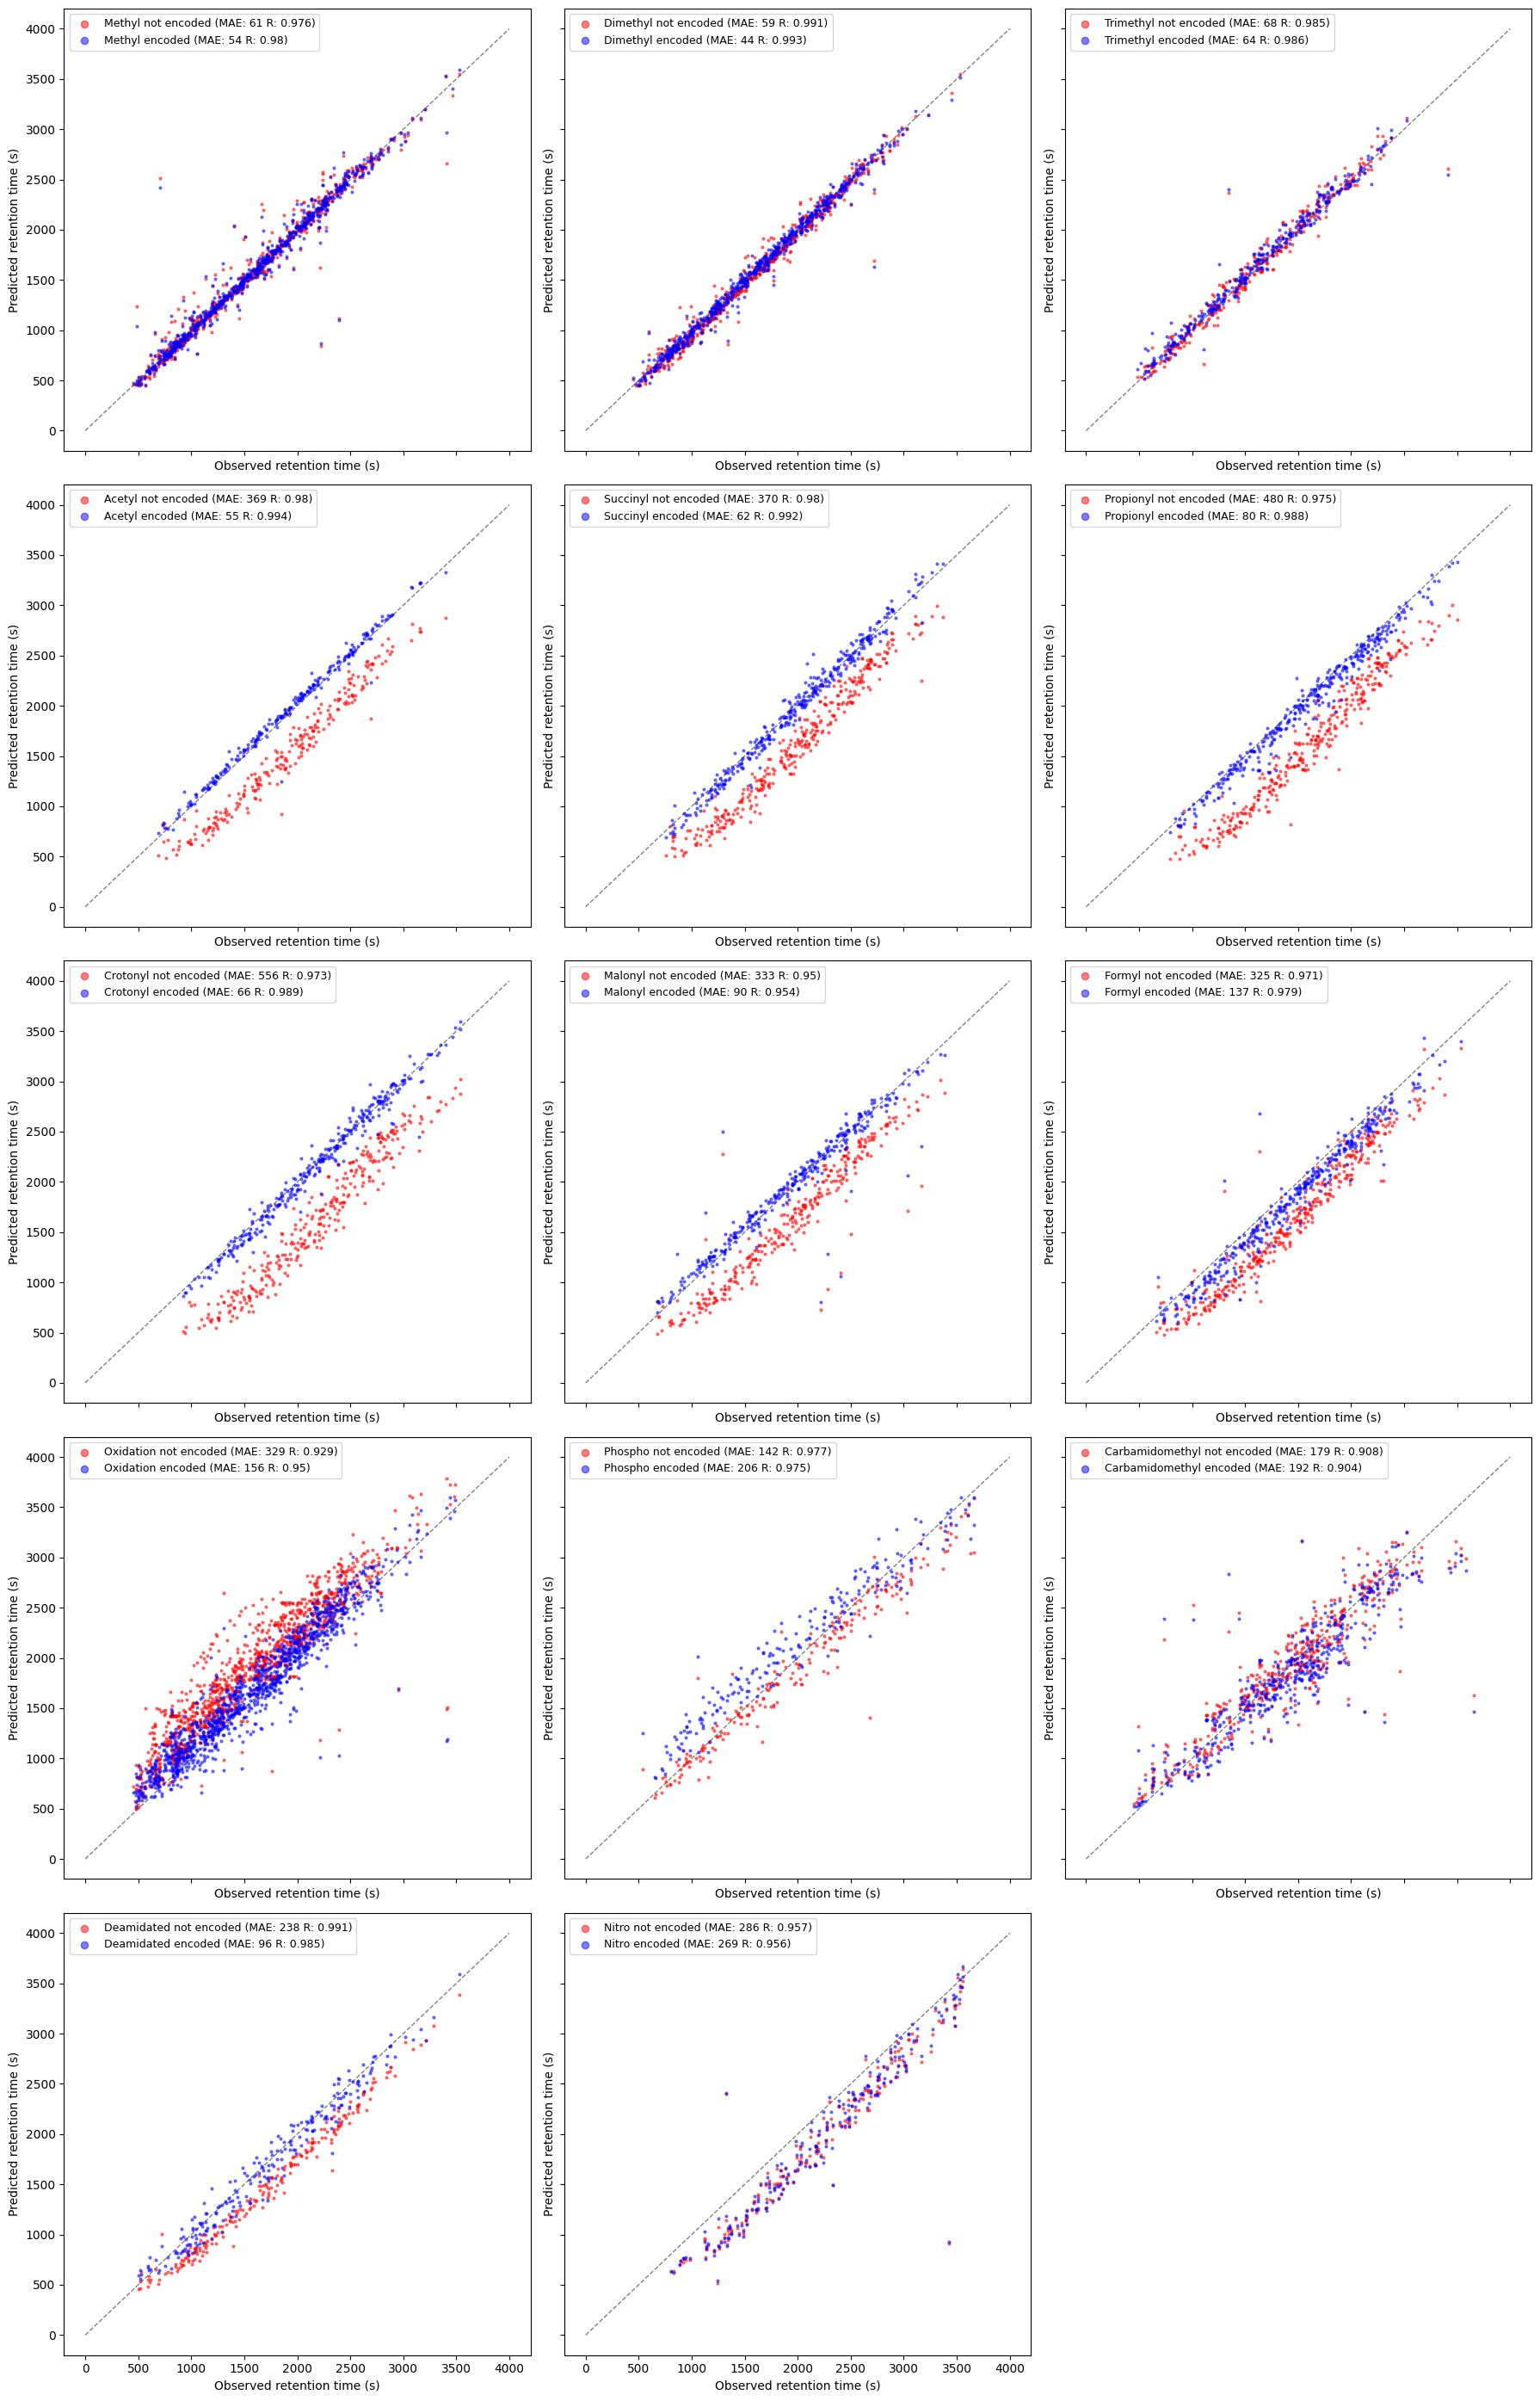

In [3]:

f, axes = plt.subplots(5,3,sharex=True,sharey=True,figsize=(18,28))

axes = list(itertools.chain(*axes))

mod_dict= {}
for ax,mod in zip(axes,mods):
    # plt.figure(figsize=[6,5])
    y_test_As, output_test_As, output_test_no_mod = [pd.read_csv(based_dir + mod + '_best_results.csv')[col] for col in ['y_test', 'output_test', 'output_test_no_mod']]
    #change the following to the correct column names
    mae_As = round(mean_absolute_error(y_test_As, output_test_As) * 60)
    mae_no_mod = round(mean_absolute_error(y_test_As, output_test_no_mod) * 60)

    r_As = round(np.corrcoef(y_test_As, output_test_As)[0,1], 3)
    r_no_mod = round(np.corrcoef(y_test_As, output_test_no_mod)[0,1], 3)
    mod_dict[mod]=(mae_As, r_As, mae_no_mod, r_no_mod)

    ax.scatter(y_test_As * 60, output_test_no_mod * 60,
               alpha=0.5,
               s=4,
               c="red",
               label="%s not encoded (MAE: %s R: %s)" % (mod,mae_no_mod,r_no_mod))

    ax.scatter(y_test_As * 60, output_test_As * 60,
               alpha=0.5,
               s=4,
               c="blue",
               label="%s encoded (MAE: %s R: %s)" % (mod, mae_As, r_As))
    ax.plot([0,4000],
             [0,4000],
             linestyle="--",
             linewidth=1.0,
             zorder=0,
             c="grey")
    lgnd = ax.legend(loc="upper left", prop={'size': 9})
    for handle in lgnd.legend_handles:
        handle.set_sizes([35.0])


    ax.set_xlabel("Observed retention time (s)")
    ax.set_ylabel("Predicted retention time (s)")

# f.savefig(based_dir+'iDeepLC.png',dpi=300)
plt.grid(False)
axes[-1].axis("off")
plt.tight_layout()
plt.savefig(based_dir+'iDeepLC.png',dpi=300)



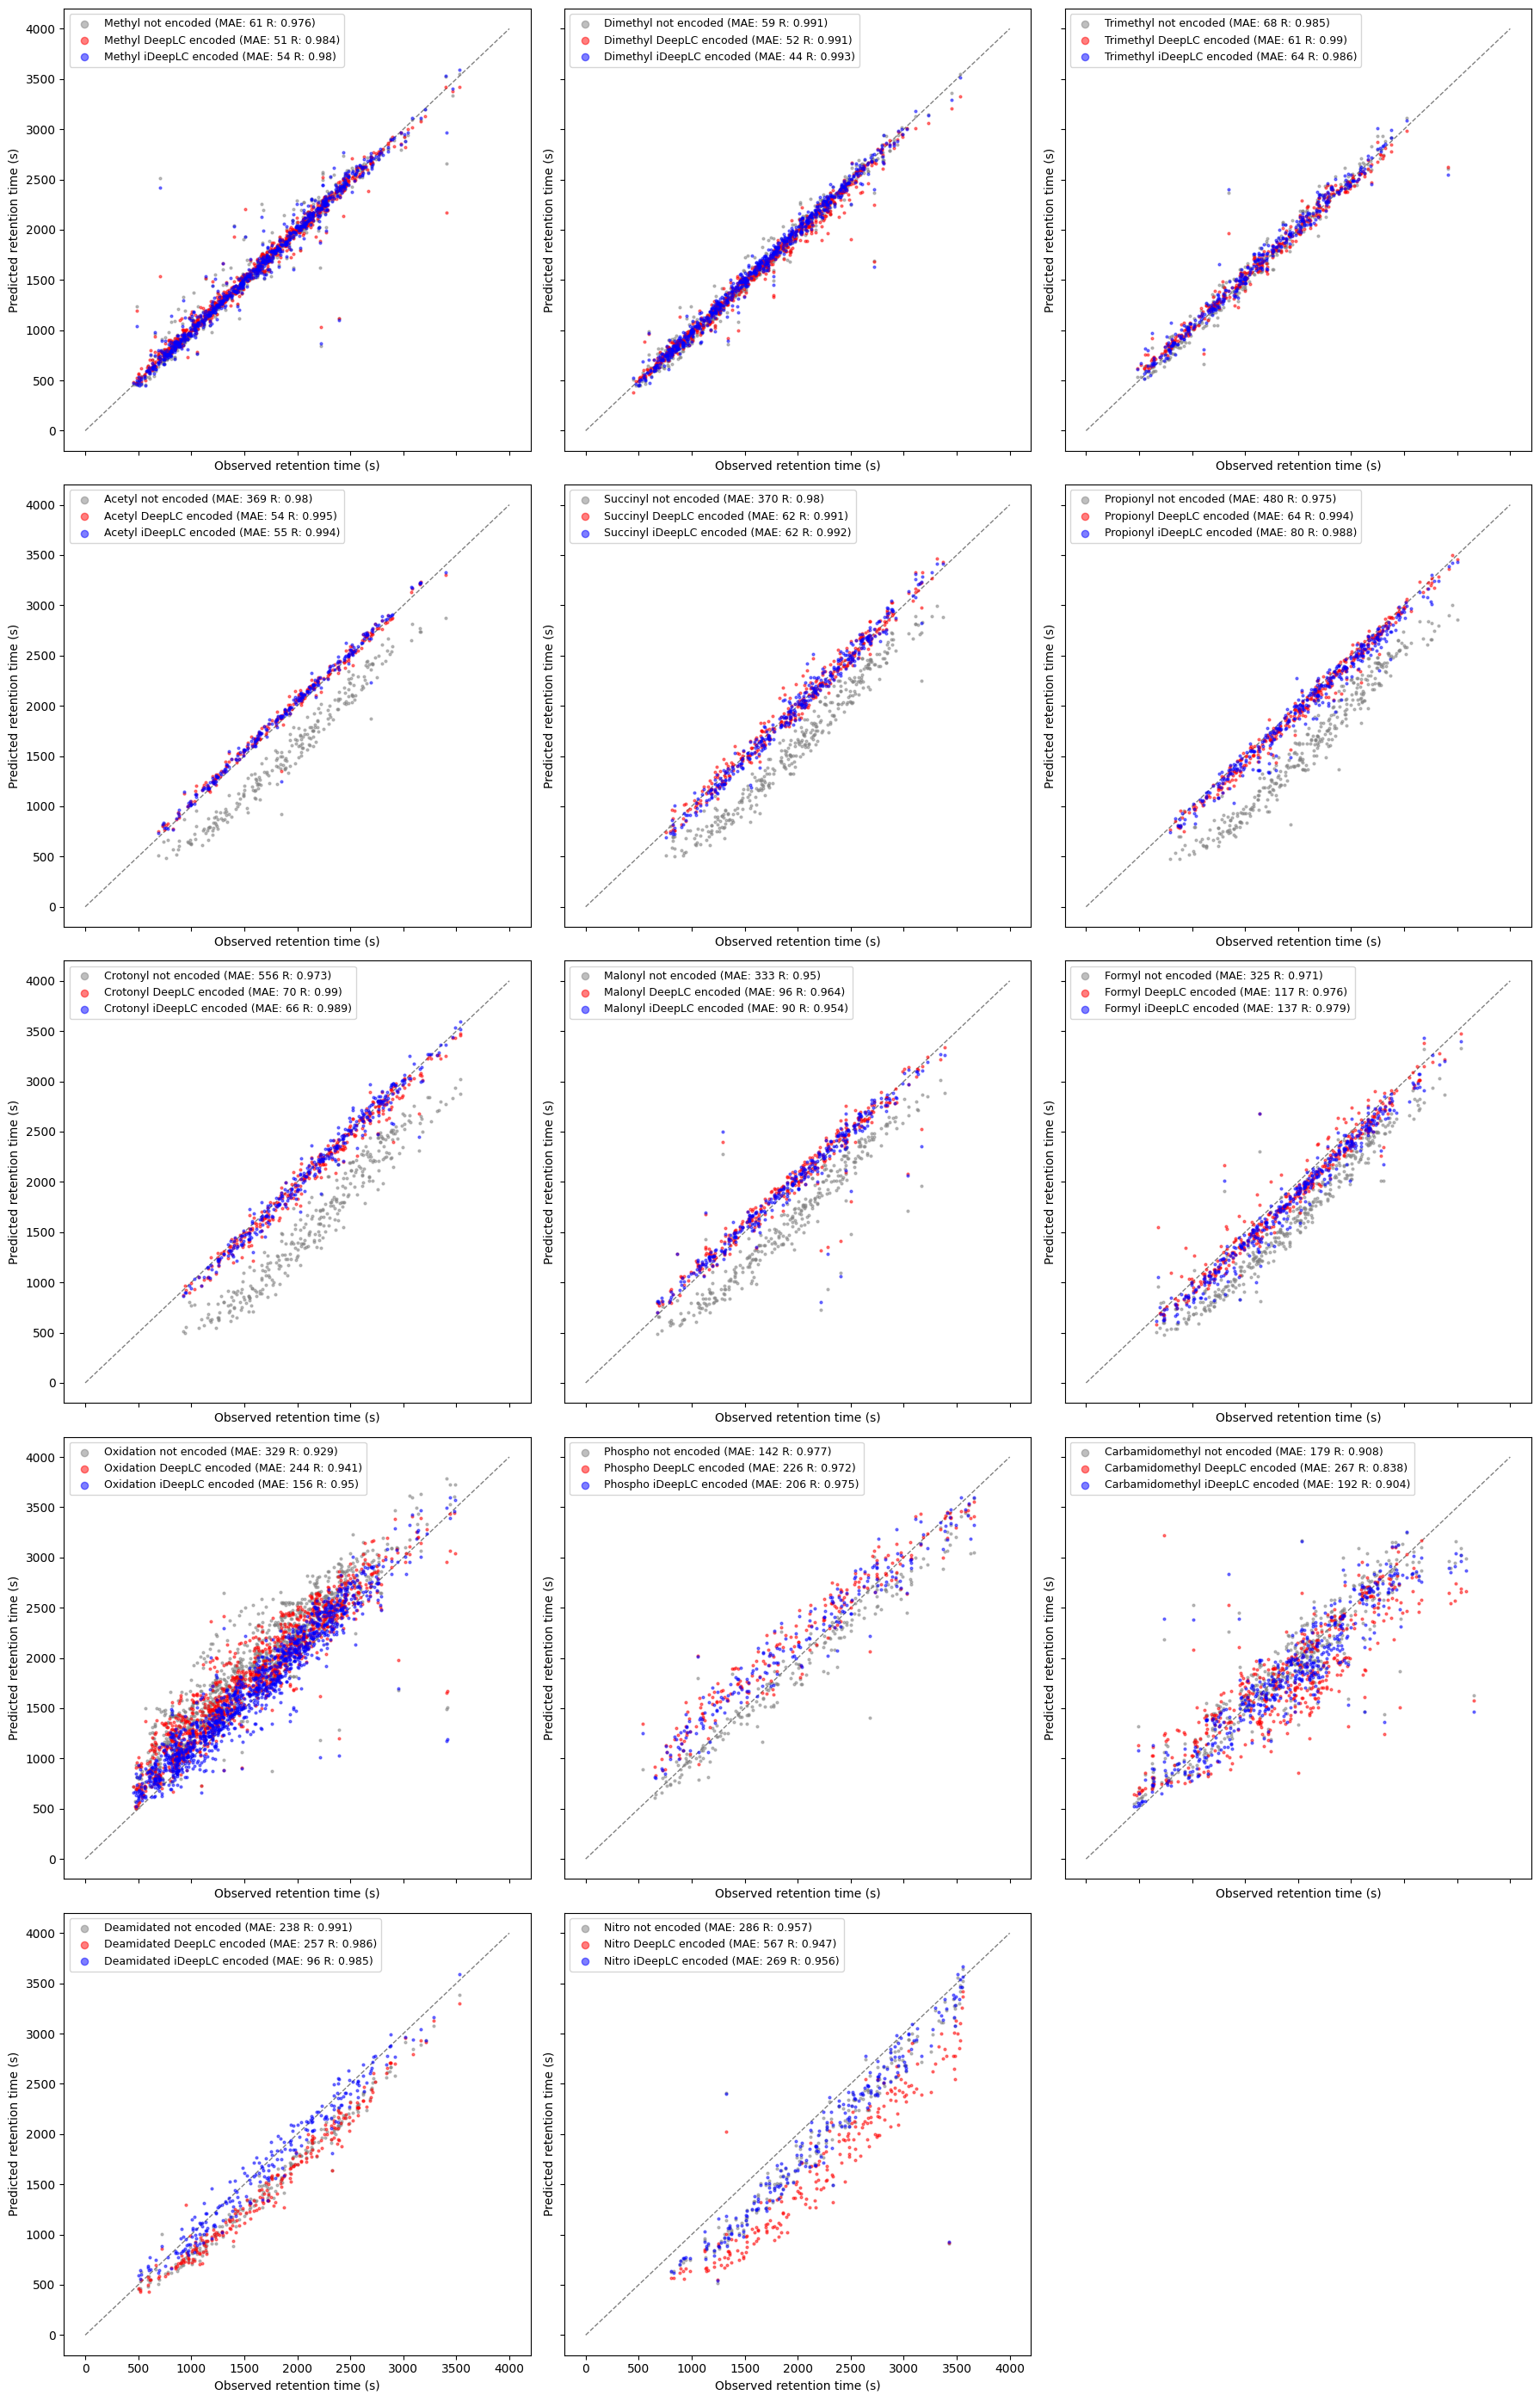

In [4]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error

f, axes = plt.subplots(5, 3, sharex=True, sharey=True, figsize=(18, 28))
axes = list(itertools.chain(*axes))

mod_dict = {}
for ax, mod in zip(axes, mods):
    y_test_As, output_test_As, output_test_no_mod = [pd.read_csv(based_dir + mod + '_best_results.csv')[col] for col in
                                                     ['y_test', 'output_test', 'output_test_no_mod']]
    output_test_Sy = pd.read_csv('D:/OneDrive - UGent/Python Codes/3Projects/DeepLC_files/figures/figures/predictions/mod_eval/prosit_ptm_2020_' + mod + '_modanalysis_test.csv')['predictions']
    mae_As = round(mean_absolute_error(y_test_As, output_test_As) * 60)
    mae_Sy = round(mean_absolute_error(y_test_As, output_test_Sy) * 60)
    mae_no_mod = round(mean_absolute_error(y_test_As, output_test_no_mod) * 60)

    r_As = round(np.corrcoef(y_test_As, output_test_As)[0, 1], 3)
    r_Sy = round(np.corrcoef(y_test_As, output_test_Sy)[0, 1], 3)
    r_no_mod = round(np.corrcoef(y_test_As, output_test_no_mod)[0, 1], 3)
    mod_dict[mod] = (mae_As, r_As, mae_no_mod, r_no_mod)

    # Plotting the scatter plot for the additional dataset with a different color


    ax.scatter(y_test_As * 60, output_test_no_mod * 60,
               alpha=0.5,
               s=4,
               c="grey",
               label="%s not encoded (MAE: %s R: %s)" % (mod, mae_no_mod, r_no_mod))


    ax.scatter(y_test_As * 60, output_test_Sy * 60,
               alpha=0.5,
               s=4,
               c="red",  # Change the color as needed
               label="%s DeepLC encoded (MAE: %s R: %s)" % (mod, mae_Sy, r_Sy))

    ax.scatter(y_test_As * 60, output_test_As * 60,
               alpha=0.5,
               s=4,
               c="blue",
               label="%s iDeepLC encoded (MAE: %s R: %s)" % (mod, mae_As, r_As))

    ax.plot([0, 4000],
            [0, 4000],
            linestyle="--",
            linewidth=1.0,
            zorder=0,
            c="grey")

    lgnd = ax.legend(loc="upper left", prop={'size': 9})
    for handle in lgnd.legend_handles:
        handle.set_sizes([35.0])

    ax.set_xlabel("Observed retention time (s)")
    ax.set_ylabel("Predicted retention time (s)")

axes[-1].axis("off")
plt.tight_layout()
plt.savefig(based_dir + 'iDeepLC_DeepLC.png')


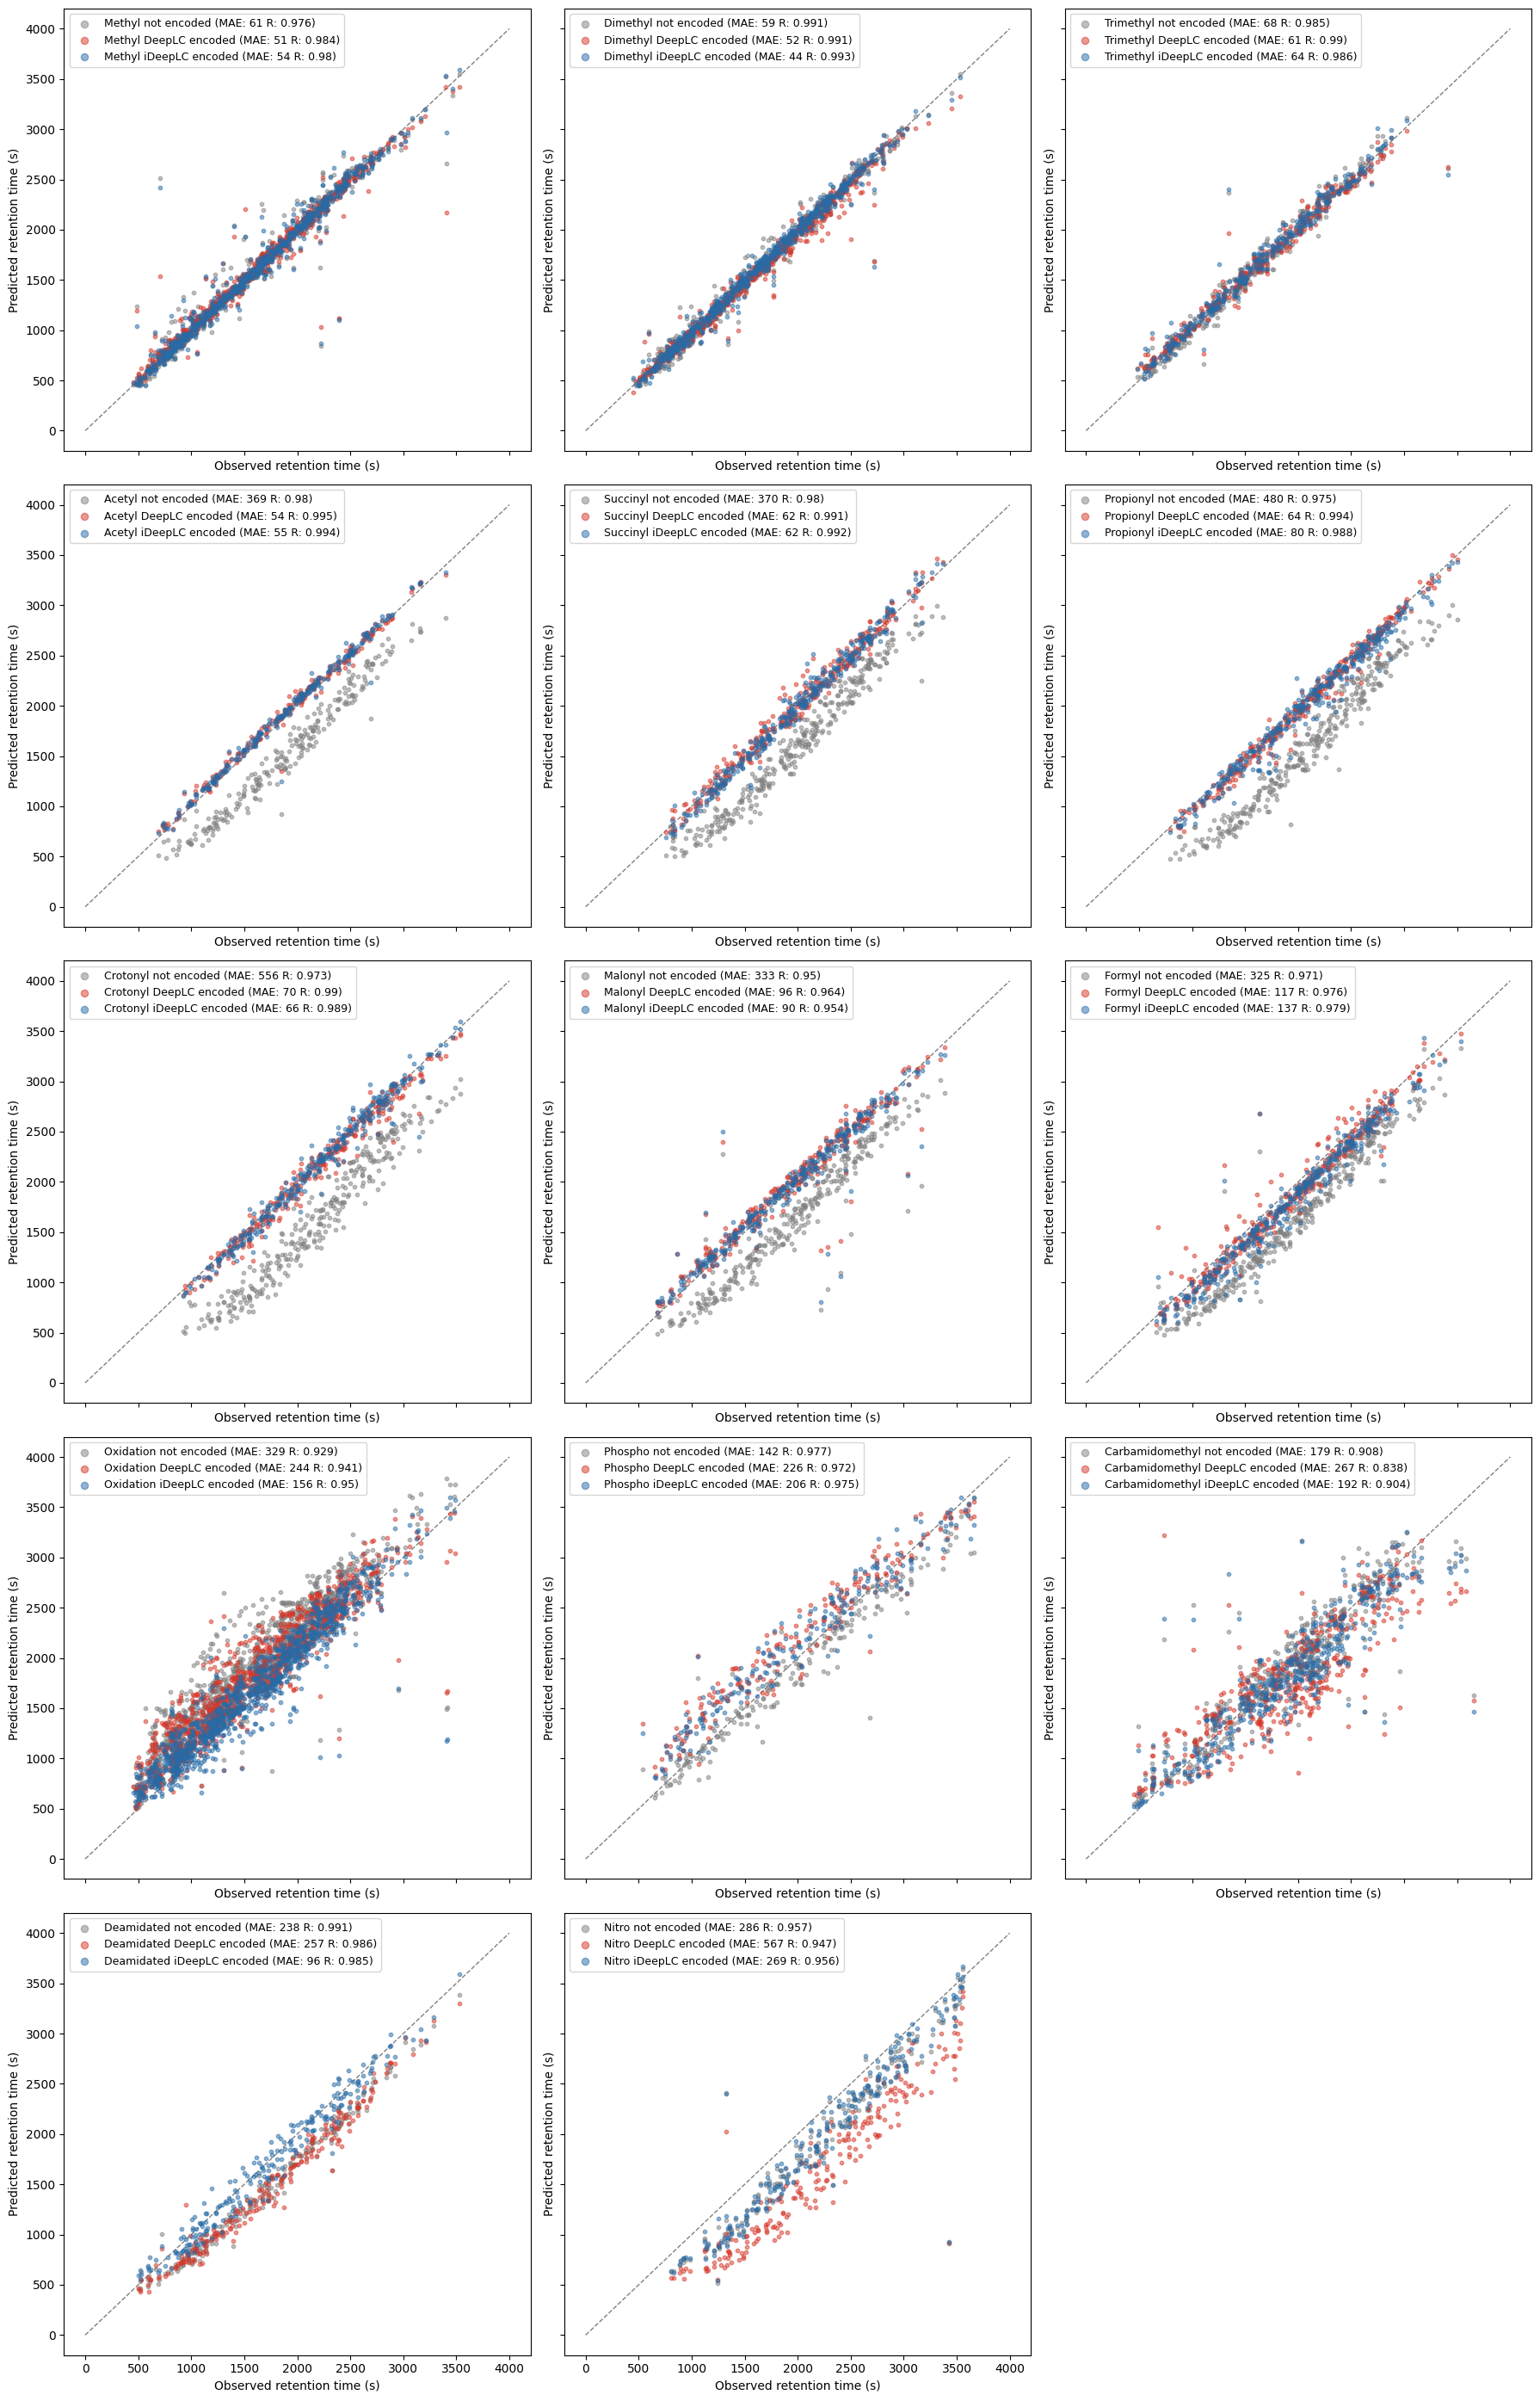

In [5]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
# import seaborn as sns
import matplotlib.cm as cm

# Define color palette
# colors = ['red','blue','grey']
colors = ["grey", "#d63729", "#276ba6"]
alpha=0.5
# Define your figure and subplots
f, axes = plt.subplots(5, 3, sharex=True, sharey=True, figsize=(18, 28))
axes = list(itertools.chain(*axes))

mod_dict = {}
# Loop through subplots and plot data
for ax, mod in zip(axes, mods):
    # Load data
    y_test_As, output_test_As, output_test_no_mod = [pd.read_csv(based_dir + mod + '_best_results.csv')[col] for col in
                                                     ['y_test', 'output_test', 'output_test_no_mod']]
    output_test_Sy = pd.read_csv('D:/OneDrive - UGent/Python Codes/3Projects/DeepLC_files/figures/figures/predictions/mod_eval/prosit_ptm_2020_' + mod + '_modanalysis_test.csv')['predictions']

    # Calculate metrics
    mae_As = round(mean_absolute_error(y_test_As, output_test_As) * 60)
    mae_Sy = round(mean_absolute_error(y_test_As, output_test_Sy) * 60)
    mae_no_mod = round(mean_absolute_error(y_test_As, output_test_no_mod) * 60)
    r_As = round(np.corrcoef(y_test_As, output_test_As)[0, 1], 3)
    r_Sy = round(np.corrcoef(y_test_As, output_test_Sy)[0, 1], 3)
    r_no_mod = round(np.corrcoef(y_test_As, output_test_no_mod)[0, 1], 3)
    mod_dict[mod] = (mae_As, r_As, mae_no_mod, r_no_mod)

    # Plot scatter plots
    ax.scatter(y_test_As * 60, output_test_no_mod * 60,
               alpha=alpha,
               s=10,
               c=colors[0],
               label="%s not encoded (MAE: %s R: %s)" % (mod, mae_no_mod, r_no_mod))

    ax.scatter(y_test_As * 60, output_test_Sy * 60,
               alpha=alpha,
               s=10,
               c=colors[1],
               label="%s DeepLC encoded (MAE: %s R: %s)" % (mod, mae_Sy, r_Sy))

    ax.scatter(y_test_As * 60, output_test_As * 60,
               alpha=alpha,
               s=10,
               c=colors[2],
               label="%s iDeepLC encoded (MAE: %s R: %s)" % (mod, mae_As, r_As))

    ax.plot([0, 4000],
            [0, 4000],
            linestyle="--",
            linewidth=1.0,
            zorder=0,
            c="grey")

    # Customize legend and labels
    lgnd = ax.legend(loc="upper left", prop={'size': 9})
    for handle in lgnd.legend_handles:
        handle.set_sizes([35.0])

    ax.set_xlabel("Observed retention time (s)")
    ax.set_ylabel("Predicted retention time (s)")

# Turn off the last subplot
axes[-1].axis("off")

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(based_dir + 'iDeepLC_DeepLC.png', dpi=300)
# plt.close()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
barplot_df_list = []
mod_dict = {}
for  mod in  mods:
    y_test_As, output_test_As, output_test_no_mod = [pd.read_csv(based_dir + mod + '_best_results.csv')[col] for col in
                                                     ['y_test', 'output_test', 'output_test_no_mod']]
    output_test_Sy = pd.read_csv('D:/OneDrive - UGent/Python Codes/3Projects/DeepLC_files/figures/figures/predictions/mod_eval/prosit_ptm_2020_' + mod + '_modanalysis_test.csv')['predictions']
    mae_As = round(mean_absolute_error(y_test_As, output_test_As) * 60)
    mae_Sy = round(mean_absolute_error(y_test_As, output_test_Sy) * 60)
    mae_no_mod = round(mean_absolute_error(y_test_As, output_test_no_mod) * 60)
    encoded_error = y_test_As * 60 - output_test_As * 60
    no_mod_error = y_test_As * 60 - output_test_no_mod * 60
    deeplc_error = y_test_As * 60 - output_test_Sy * 60

    r_As = round(np.corrcoef(y_test_As, output_test_As)[0, 1], 3)
    r_Sy = round(np.corrcoef(y_test_As, output_test_Sy)[0, 1], 3)
    r_no_mod = round(np.corrcoef(y_test_As, output_test_no_mod)[0, 1], 3)
    mod_not_enc = pd.DataFrame({'predictions': output_test_no_mod, 'error': no_mod_error, 'encoding': 'Not encoded', 'm': mod})
    mod_enc = pd.DataFrame({'predictions': output_test_As, 'error': encoded_error, 'encoding': 'Encoded iDeepLC', 'm': mod})

    mod_deeplc = pd.DataFrame({'predictions': output_test_Sy, 'error': deeplc_error, 'encoding': 'Encoded DeepLC', 'm': mod})
    # Calculate MAE and correlation for each DataFrame
    mod_enc['mae'] = mae_As
    mod_not_enc['mae'] = mae_no_mod
    mod_deeplc['mae'] = mae_Sy
    mod_enc['R'] = r_As
    mod_not_enc['R'] = r_no_mod
    mod_deeplc['R'] = r_Sy

    # Concatenate the DataFrames for encoded and non-encoded data
    barplot_df = pd.concat([ mod_not_enc,  mod_deeplc,mod_enc])

    # Append the concatenated DataFrame to the list
    barplot_df_list.append(barplot_df)

# Concatenate all DataFrames in the list to create the final DataFrame
final_barplot_df = pd.concat(barplot_df_list)






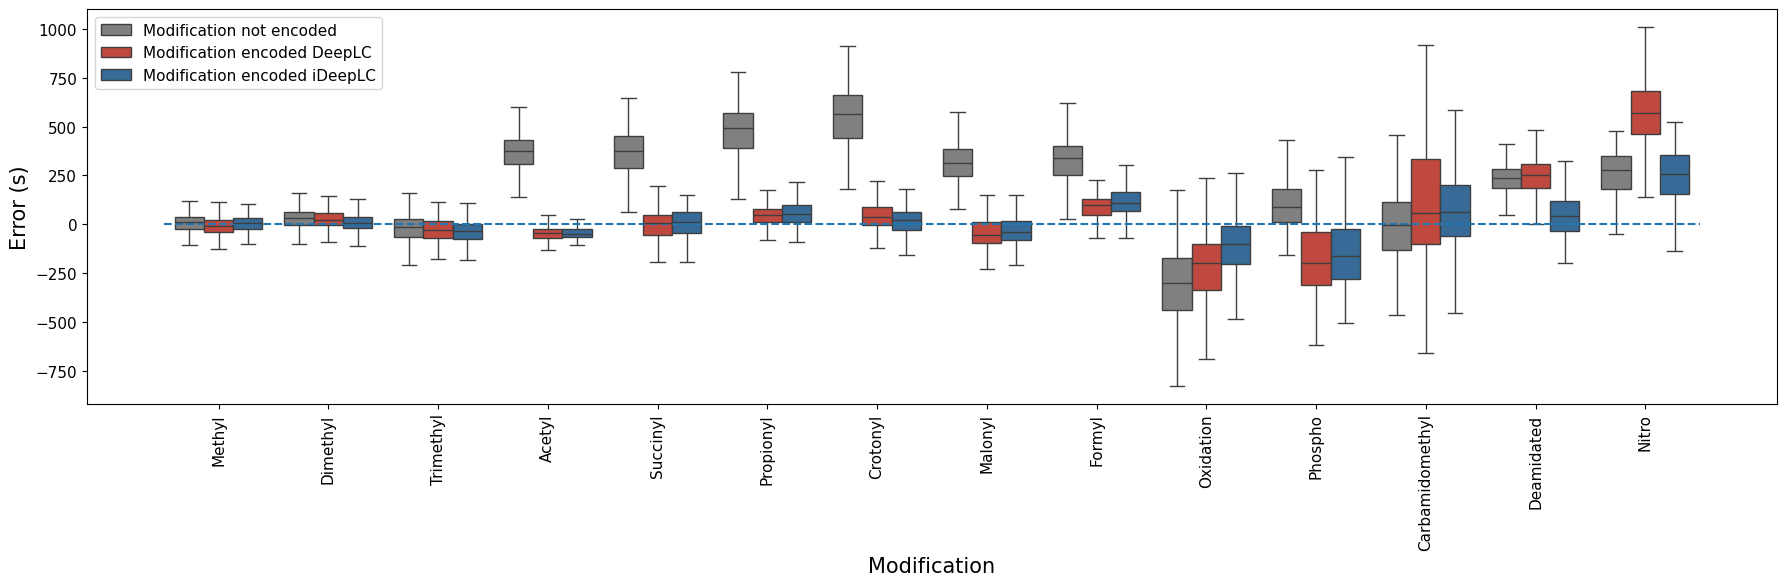

In [7]:
plt.figure(figsize=[18,6])

plt.rcParams.update({'font.size': 11})

sns.boxplot(x="m",
            y="error",
            hue="encoding",
            data=final_barplot_df,
            palette=["grey", "#d63729", "#276ba6"],
            fliersize=2,
            showfliers=False)

ax = plt.gca()
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Modification not encoded",  "Modification encoded DeepLC", "Modification encoded iDeepLC",])
ax = plt.gca()
plt.xlabel("Modification", fontsize=15)
plt.ylabel("Error (s)", fontsize=15)
plt.hlines(y=0,xmin=-0.5,xmax=13.5,linestyle="--")
plt.xticks(rotation='vertical')
plt.tight_layout()
# plt.savefig(based_dir+'boxplot.png',dpi=300)
plt.savefig(based_dir+'boxplot.svg',transparent=True)

In [7]:
barplot_df_list

[     predictions       error         encoding       m  mae      R
 0      18.775265   11.496620      Not encoded  Methyl   60  0.975
 1      32.913666    6.185074      Not encoded  Methyl   60  0.975
 2      34.651031  112.400665      Not encoded  Methyl   60  0.975
 3      17.066624   30.300064      Not encoded  Methyl   60  0.975
 4      26.278713  -13.850327      Not encoded  Methyl   60  0.975
 ..           ...         ...              ...     ...  ...    ...
 746    13.636604  -24.036255  Encoded iDeepLC  Methyl   76  0.978
 747    22.194748  -80.624886  Encoded iDeepLC  Methyl   76  0.978
 748    12.953524  -26.401405  Encoded iDeepLC  Methyl   76  0.978
 749    24.737514  -80.610924  Encoded iDeepLC  Methyl   76  0.978
 750    40.178379 -222.562637  Encoded iDeepLC  Methyl   76  0.978
 
 [2253 rows x 6 columns],
      predictions       error         encoding         m  mae      R
 0      15.308292   85.339966      Not encoded  Dimethyl   60  0.988
 1      22.066435   10.076408 

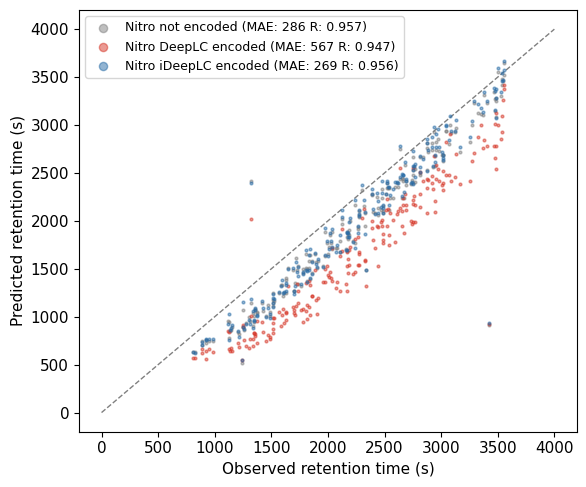

In [9]:
mod = "Nitro"  # Specify the mod for which you want to generate plots
colors = ["grey", "#d63729", "#276ba6"]
Asymmetric = pd.read_csv(based_dir + mod + '_best_results.csv')
output_test_Sy = pd.read_csv('D:/OneDrive - UGent/Python Codes/3Projects/DeepLC_files/figures/figures/predictions/mod_eval/prosit_ptm_2020_' + mod + '_modanalysis_test.csv')['predictions']
y_test_As = Asymmetric['y_test']
output_test_As = Asymmetric['output_test']
output_test_no_mod = Asymmetric['output_test_no_mod']

mae_As = round(mean_absolute_error(y_test_As, output_test_As) * 60)
mae_no_mod = round(mean_absolute_error(y_test_As, output_test_no_mod) * 60)
mae_Sy = round(mean_absolute_error(y_test_As, output_test_Sy) * 60)

r_As = round(np.corrcoef(y_test_As, output_test_As)[0, 1], 3)
r_no_mod = round(np.corrcoef(y_test_As, output_test_no_mod)[0, 1], 3)
r_Sy = round(np.corrcoef(y_test_As, output_test_Sy)[0, 1], 3)

fig, ax = plt.subplots(figsize=(6, 5))

ax.scatter(y_test_As * 60, output_test_no_mod * 60, alpha=0.5, s=4, c=colors[0],
           label="%s not encoded (MAE: %s R: %s)" % (mod, mae_no_mod, r_no_mod))

ax.scatter(y_test_As * 60, output_test_Sy * 60, alpha=0.5, s=4, c=colors[1],
           label="%s DeepLC encoded (MAE: %s R: %s)" % (mod, mae_Sy, r_Sy))

ax.scatter(y_test_As * 60, output_test_As * 60, alpha=0.5, s=4, c=colors[2],
           label="%s iDeepLC encoded (MAE: %s R: %s)" % (mod, mae_As, r_As))


ax.plot([0, 4000], [0, 4000], linestyle="--", linewidth=1.0, zorder=0, c="grey")

lgnd = ax.legend(loc="upper left", prop={'size': 9})
for handle in lgnd.legend_handles:
    handle.set_sizes([35.0])

ax.set_xlabel("Observed retention time (s)")
ax.set_ylabel("Predicted retention time (s)")

plt.tight_layout()
plt.savefig(based_dir + 'iDeepLC_DeepLC_{}.png'.format(mod), dpi=300)
# plt.close()  # Close the figure after saving

# Compare iDeepLC and DeepLC_new figure

In [10]:
from adjustText import adjust_text
data = {
    "PTM": ["Methyl", "Dimethyl", "Trimethyl", "Acetyl", "Succinyl", "Propionyl",
            "Crotonyl", "Malonyl", "Formyl", "Oxidation", "Phospho",
            "Carbamidomethyl", "Deamidated", "Nitro"],
    "baseline": [60, 60, 64, 378, 383, 487, 570, 341, 322, 329, 143, 195, 248, 283],
    "DeepLC": [51, 52, 61, 54, 62, 64, 70, 96, 117, 244, 226, 267, 257, 567],
    # "iDeepLC": [76, 50, 60, 58, 63, 65, 60, 88, 113, 245, 195, 197, 94, 228]
    "iDeepLC": [54, 44, 64, 55, 62, 80, 66, 90, 137, 156, 206, 192, 96, 269]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

df['DeepLC_decrease'] = round(((df['baseline'] - df['DeepLC']) / df['baseline']) * 100)
df['iDeepLC_decrease'] = round(((df['baseline'] - df['iDeepLC']) / df['baseline']) * 100)

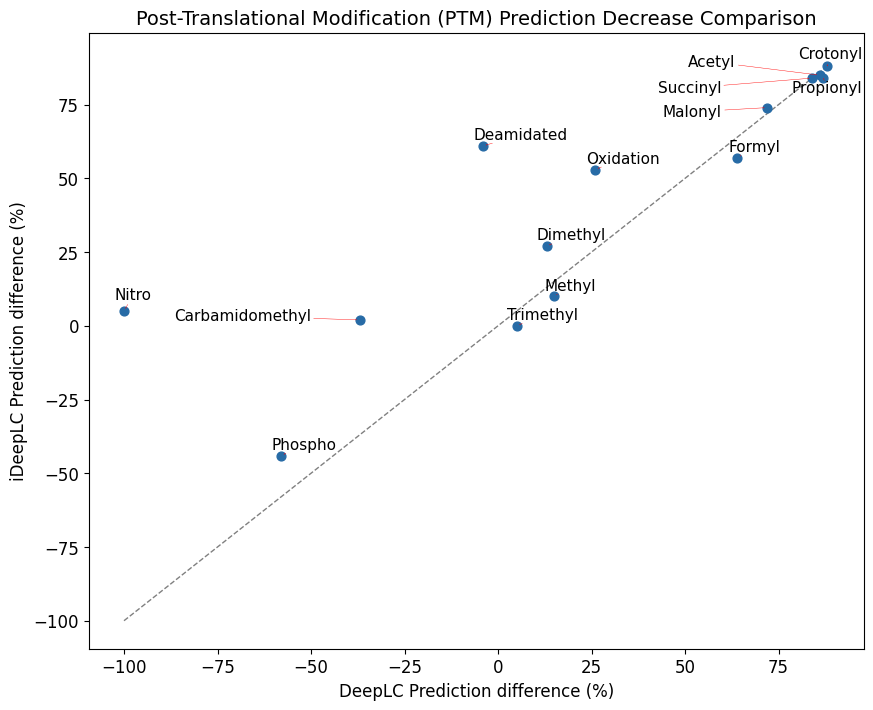

In [11]:
plt.figure(figsize=(10, 8))

# Create the scatter plot
plt.scatter(df['DeepLC_decrease'], df['iDeepLC_decrease'], s=40, c="#276ba6",)

# Annotate each point with the PTM name. Adjust text alignment for better legibility
texts = []
for i, txt in enumerate(df['PTM']):
    # Offset the text slightly to avoid starting exactly at the point which can look cluttered
    texts.append(plt.text(df['DeepLC_decrease'][i], df['iDeepLC_decrease'][i], txt, ha='right', va='bottom'))

# Add this line of code
adjust_text(texts, only_move={'points': 'xy', 'texts': 'xy', },expand=(2,2), arrowprops=dict(arrowstyle="->", color='r', lw=0.3))



# Set the title with a larger font size
plt.title('Post-Translational Modification (PTM) Prediction Decrease Comparison', fontsize=14)

# # Remove top and right spines
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# Increase the font size of the axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
min_val = min(df['DeepLC_decrease'].min(), df['iDeepLC_decrease'].min())
max_val = max(df['DeepLC_decrease'].max(), df['iDeepLC_decrease'].max())
# Add a diagonal line representing y=x for reference
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", linewidth=1.0, zorder=0, c="grey")
plt.xlabel('DeepLC Prediction difference (%)', fontsize=12)
plt.ylabel('iDeepLC Prediction difference (%)', fontsize=12)
plt.savefig(based_dir + 'iDeepLC_DeepLC_comparison.png', dpi=300)

In [12]:
df


,PTM,baseline,DeepLC,iDeepLC,DeepLC_decrease,iDeepLC_decrease
0,Methyl,60,51,54,15.0,10.0
1,Dimethyl,60,52,44,13.0,27.0
2,Trimethyl,64,61,64,5.0,0.0
3,Acetyl,378,54,55,86.0,85.0
4,Succinyl,383,62,62,84.0,84.0
5,Propionyl,487,64,80,87.0,84.0
6,Crotonyl,570,70,66,88.0,88.0
7,Malonyl,341,96,90,72.0,74.0
8,Formyl,322,117,137,64.0,57.0
9,Oxidation,329,244,156,26.0,53.0
